In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as colors


%matplotlib inline

In [33]:
def change_col_dt(df):
    new_df = df.T.copy()
    new_df.index =  pd.to_datetime(new_df.index)
    return new_df.T.copy()

In [34]:
from tslearn.clustering import TimeSeriesKMeans

In [35]:
def import_data_JHU():
    # url to the data 'Novel Coronavirus (COVID-19) Cases', provided by JHU CSSE
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

    # confirmed cases and deaths worldwide for each country
    cases = pd.read_csv(url + 'time_series_covid19_confirmed_global.csv')
    deaths = pd.read_csv(url + 'time_series_covid19_deaths_global.csv')

    # we sum over Province/State for countries (US = Alabama, Alaska,..)
    cases = cases.groupby('Country/Region', axis=0).sum()
    deaths = deaths.groupby('Country/Region', axis=0).sum()
    #group Italy and San Marino:
    cases.loc['Italy'] = cases.loc['Italy'] + cases.loc['San Marino']
    cases.drop(['San Marino'],inplace=True)
    cases.rename(index={'United Kingdom': 'UK'}, inplace=True)
    deaths.loc['Italy'] = deaths.loc['Italy'] + deaths.loc['San Marino']
    deaths.drop(['San Marino'],inplace=True)
    deaths.rename(index={'United Kingdom': 'UK'}, inplace=True)
    

    # Some cleaning of the data:
    last_day = cases.columns[-1]
    cases.sort_values( [last_day], ascending=False,
                       axis=0, inplace=True)      # ordering by total number of latest point
    deaths = deaths.reindex(index=cases.index)    # same ordering as cases

    cases.index.name = None                       # delete the name of the index
    deaths.index.name = None

    # delete the following rows from the data
    to_del = ['Diamond Princess', 'MS Zaandam', 'Holy See', 'Western Sahara']
    cases = cases.drop(to_del)
    deaths = deaths.drop(to_del)

    new_df = deaths.iloc[:,2:].T.copy()
    new_df.index =  pd.to_datetime(new_df.index)
    deaths = new_df.T.copy()

    new_df = cases.iloc[:,2:].T.copy()
    new_df.index =  pd.to_datetime(new_df.index)
    cases = new_df.T.copy()

    cases.to_csv('data/cases.csv')
    deaths.to_csv('data/deaths.csv')
    return True


In [36]:
cases = pd.read_csv('data/cases_13_09.csv', index_col=0)
deaths = pd.read_csv('data/deaths_13_09.csv', index_col=0)
#cases = change_col_dt(cases)
#deaths = change_col_dt(deaths)

In [37]:
cases = change_col_dt(cases)
cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
US,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,...,6200518.0,6244970.0,6276365.0,6300622.0,6327009.0,6360212.0,6396100.0,6443652.0,6485123.0,6519573.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4023179.0,4113811.0,4204613.0,4280422.0,4370128.0,4465863.0,4562414.0,4659984.0,4754356.0,4754356.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4091801.0,4123000.0,4137521.0,4147794.0,4162073.0,4197889.0,4238446.0,4282164.0,4315687.0,4330455.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1011987.0,1017131.0,1022228.0,1027334.0,1032354.0,1037526.0,1042836.0,1048257.0,1053663.0,1059024.0
Peru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,670145.0,676848.0,683702.0,689977.0,691575.0,696190.0,702776.0,710067.0,716670.0,722832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Timor-Leste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,22.0,22.0,24.0,24.0,24.0,24.0
Laos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,23.0,23.0


In [38]:
cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
US,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,...,6200518.0,6244970.0,6276365.0,6300622.0,6327009.0,6360212.0,6396100.0,6443652.0,6485123.0,6519573.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4023179.0,4113811.0,4204613.0,4280422.0,4370128.0,4465863.0,4562414.0,4659984.0,4754356.0,4754356.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4091801.0,4123000.0,4137521.0,4147794.0,4162073.0,4197889.0,4238446.0,4282164.0,4315687.0,4330455.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1011987.0,1017131.0,1022228.0,1027334.0,1032354.0,1037526.0,1042836.0,1048257.0,1053663.0,1059024.0
Peru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,670145.0,676848.0,683702.0,689977.0,691575.0,696190.0,702776.0,710067.0,716670.0,722832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Timor-Leste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,22.0,22.0,22.0,22.0,22.0,24.0,24.0,24.0,24.0
Laos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,23.0,23.0


In [39]:
last_day = cases.columns[-1]

In [40]:
population_2018 = pd.read_csv('data/population_2018_2.csv', index_col=0)
population_2018.rename(index={'United Kingdom': 'UK'}, inplace=True)
population_2018.loc['Italy'] = population_2018.loc['Italy'] + population_2018.loc['San Marino']
population_2018.drop('San Marino', inplace=True)

In [41]:
population_2018.loc[cases.index]

,Value
US,326687501
India,1352617328
Brazil,209469333
Russia,144478050
Peru,31989256
...,...
Timor-Leste,1267972
Grenada,111454
Dominica,71625
Laos,7061507


In [10]:
cases_pT =  cases / population_2018.loc[cases.index].values * 100000
deaths_pT = deaths / population_2018.loc[deaths.index].values * 100000

In [11]:
cases_pT

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
US,0.000306,0.000306,0.000612,0.000612,0.001531,0.001531,0.001531,0.001531,0.001531,0.002143,...,1897.996704,1911.603591,1921.213692,1928.638831,1936.715969,1946.879504,1957.864926,1972.420732,1985.115127,1995.660373
India,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000074,0.000074,...,297.436601,304.137091,310.850151,316.454766,323.086797,330.164556,337.302643,344.516066,351.493057,351.493057
Brazil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1953.412913,1968.307218,1975.239497,1980.143795,1986.960545,2004.058990,2023.420774,2044.291610,2060.295385,2067.345581
Russia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001384,...,700.443424,704.003826,707.531698,711.065799,714.540375,718.120157,721.795456,725.547583,729.289328,732.999926
Peru,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2094.906490,2115.860400,2137.286344,2156.902305,2161.897732,2176.324451,2196.912613,2219.704641,2240.345946,2259.608664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Timor-Leste,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.129385,2.129385,2.129385,2.129385,2.129385,2.129385,2.129385,2.129385,2.129385,2.129385
Grenada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.533547,21.533547,21.533547,21.533547,21.533547,21.533547,21.533547,21.533547,21.533547,21.533547
Dominica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.923211,30.715532,30.715532,30.715532,30.715532,30.715532,33.507853,33.507853,33.507853,33.507853
Laos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.311548,0.311548,0.311548,0.311548,0.311548,0.311548,0.311548,0.325710,0.325710,0.325710


In [43]:
population_2018.loc[deaths.index].values

array([[ 326687501],
       [1352617328],
       [ 209469333],
       [ 144478050],
       [  31989256],
       [  49648685],
       [ 126190788],
       [  57779622],
       [  46796540],
       [  44494502],
       [  18729160],
       [  66977107],
       [  81800269],
       [  66460344],
       [ 161356039],
       [  33699947],
       [ 212215030],
       [  82319724],
       [  38433600],
       [  60455545],
       [  82905782],
       [ 106651922],
       [ 267663435],
       [  44622516],
       [   8882800],
       [  37057765],
       [  11353142],
       [   2781677],
       [  17084357],
       [  18272430],
       [  10627165],
       [  19466145],
       [   4176873],
       [  98423595],
       [   4137309],
       [  11433256],
       [1392730000],
       [   4829483],
       [  36029138],
       [  10175214],
       [  17231624],
       [  17247807],
       [   9630959],
       [ 126529100],
       [   9483499],
       [  37974750],
       [   9587522],
       [ 1092

In [14]:
cases_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

In [15]:
cases_pT_new = cases_pT.diff(axis=1)
deaths_pT_new = deaths_pT.diff(axis=1)

In [16]:
coord = pd.read_csv('data/coord_13_09.csv', index_col=0)

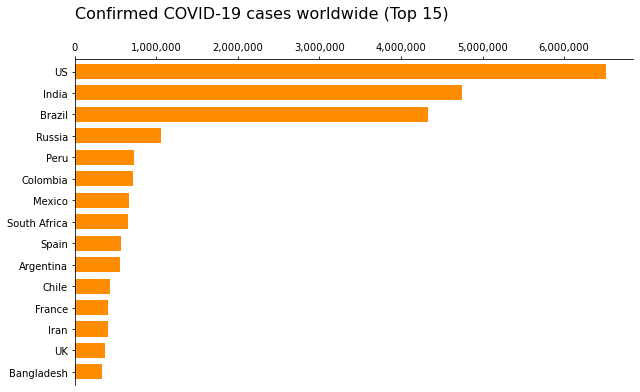

In [17]:
ax = cases.iloc[:, -1].head(15).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darkorange')
ax.set_title('Confirmed COVID-19 cases worldwide (Top 15)\n', fontsize=16,loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

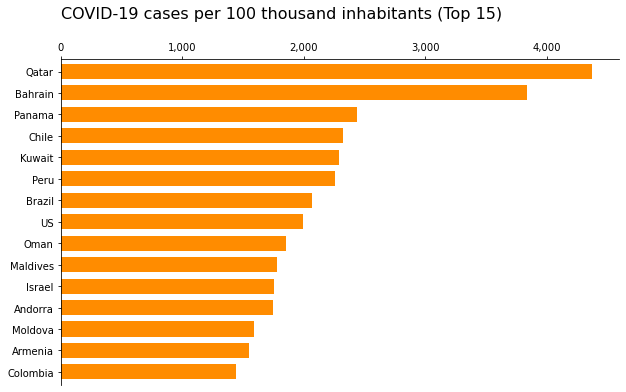

In [18]:
ax = cases_pT.iloc[:, -1].head(15).plot(kind='barh',
                                        figsize=(10, 6),
                                        width=0.7,
                                        color='darkorange')
ax.set_title('COVID-19 cases per 100 thousand inhabitants (Top 15)\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

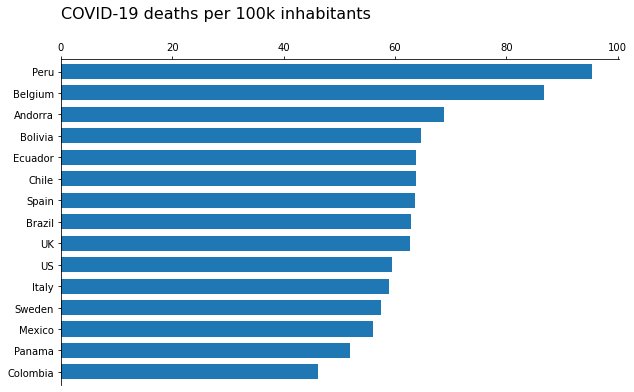

In [19]:
deaths_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

ax = deaths_pT.iloc[:, -1].sort_values(ascending=False).head(15).plot(kind='barh',
                                         figsize=(10, 6),
                                         width=0.7)
ax.set_title('COVID-19 deaths per 100k inhabitants\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

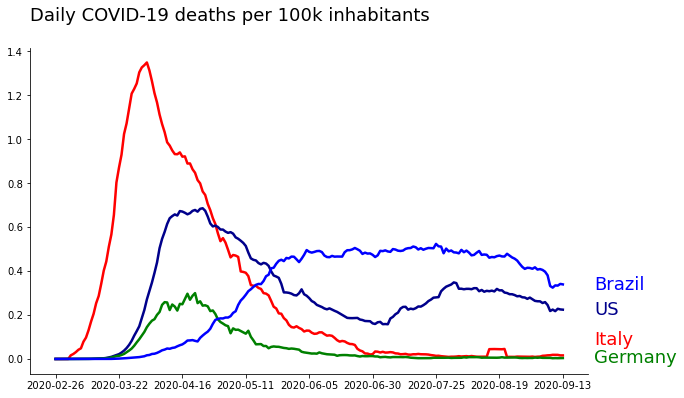

In [20]:
countries = ['Italy', 'US','Germany','Brazil']
delay_days = 35
colors = ['red', 'darkblue', 'green','blue']
fig, ax2 = plt.subplots()
for country, col in zip(countries, colors):
    deaths_pT_new.loc[country][delay_days:].rolling(7).mean().fillna(
        0).plot(kind='line',
                linewidth=2.5,
                label=country,
                figsize=(10, 6),
                color=col, ax=ax2)
ax2.set_title('Daily COVID-19 deaths per 100k inhabitants\n', fontsize=18, loc='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
for line, name, sett in zip(ax2.lines, countries, [0.07, 0, 0.0,0.0,0.0]):
    y = line.get_ydata()[-1]
    ax2.annotate(name,
                 xy=(1, y + sett),
                 xytext=(6, 0),
                 color=line.get_color(),
                 xycoords=ax2.get_yaxis_transform(),
                 textcoords="offset points",
                 size=18,
                 va="center")

COVID-19 deaths vs time curves
3.532 --> 2.646 --> 2.571 --> 2.529 --> 2.506 --> 2.500 --> 2.500 --> 
green cluster, N = 158
red cluster, N = 9
blue cluster, N = 16


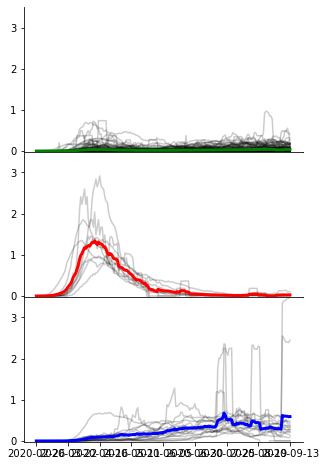

In [21]:
from tslearn.utils import to_time_series_dataset
cluster = 3
df = deaths_pT_new.iloc[:,35:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['blue', 'red', 'green']
names = ['blue cluster','red cluster','green cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(5, 8))

for yi,cl,xs in zip(range(cluster),[2,1,0],[ax1,ax2,ax3]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
plt.ylim(-0.02, 3.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)